In [3]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from concurrent.futures import ThreadPoolExecutor
from pyvis.network import Network
import plotly.express as px
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA

In [46]:
country_net = nx.read_graphml("../networks/graphml/countries_network.graphml")
city_net = nx.read_graphml("../networks/graphml/cities_network.graphml")
combined_net = nx.read_graphml("../networks/graphml/combined_network.graphml")

In [54]:
def get_jaccard_weight(G, u, v):
    # Get neighbors regardless of direction
    set_u = set(nx.all_neighbors(G, u))
    set_v = set(nx.all_neighbors(G, v))
    union_len = len(set_u.union(set_v))
    if union_len == 0: return -1
    return -(len(set_u.intersection(set_v)) / union_len) - 1

def plot_network(G, title):

    # # For every edge (u, v), set weight based on shared neighbors
    jacquard_weights = []
    with ThreadPoolExecutor() as executor:
        futures = []
        for u, v in G.edges():
            futures.append(executor.submit(get_jaccard_weight, G, u, v))
        for future in futures:
            jacquard_weights.append(future.result())

    min_jaccard = min(jacquard_weights)
    max_jaccard = max(jacquard_weights)
    for (u, v), weight in zip(G.edges(), jacquard_weights):
        normalized_weight = 0.5 * ((weight - min_jaccard) / (max_jaccard - min_jaccard)) if max_jaccard != min_jaccard else 0
        weight = -normalized_weight**2 + normalized_weight
        G[u][v]['weight'] = weight

    fig, ax = plt.subplots(figsize=(16, 10))

    pos = nx.spring_layout(G, method='energy', weight='weight', k=10, iterations=500)

    degrees = np.array([G.degree(n) for n in G.nodes()])
    norm = Normalize(degrees.min(), degrees.max())
    normed_degrees = norm(degrees)

    cmap = plt.get_cmap('coolwarm')  # blue to red
    node_colors = cmap(-normed_degrees**2 + 2*normed_degrees)
    node_map = dict(zip(G.nodes(), node_colors))

    node_size=(-normed_degrees**2 + 2*normed_degrees)*300 + 50

    nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_colors, edgecolors=node_colors, alpha=0.5, ax=ax)
    nx.draw_networkx_edges(G, pos, edge_color=[node_map[v] for u, v in G.edges()], alpha=0.3, ax=ax)

    # Keep the lower 50% of labels by degree and the top 10% of labels by degree
    degrees_sorted = sorted(degrees)
    degree_threshold_low = degrees_sorted[int(0.5 * len(degrees_sorted))]
    degree_threshold_high = degrees_sorted[int(0.9 * len(degrees_sorted))]
    labels = {n: n for n in G.nodes() if G.degree(n) >= degree_threshold_high or G.degree(n) <= degree_threshold_low}

    nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, alpha=0.7, ax=ax)

    ax.set_title(title, fontsize=18, fontweight='bold')
    ax.axis('off')
    plt.tight_layout()

    return fig, ax

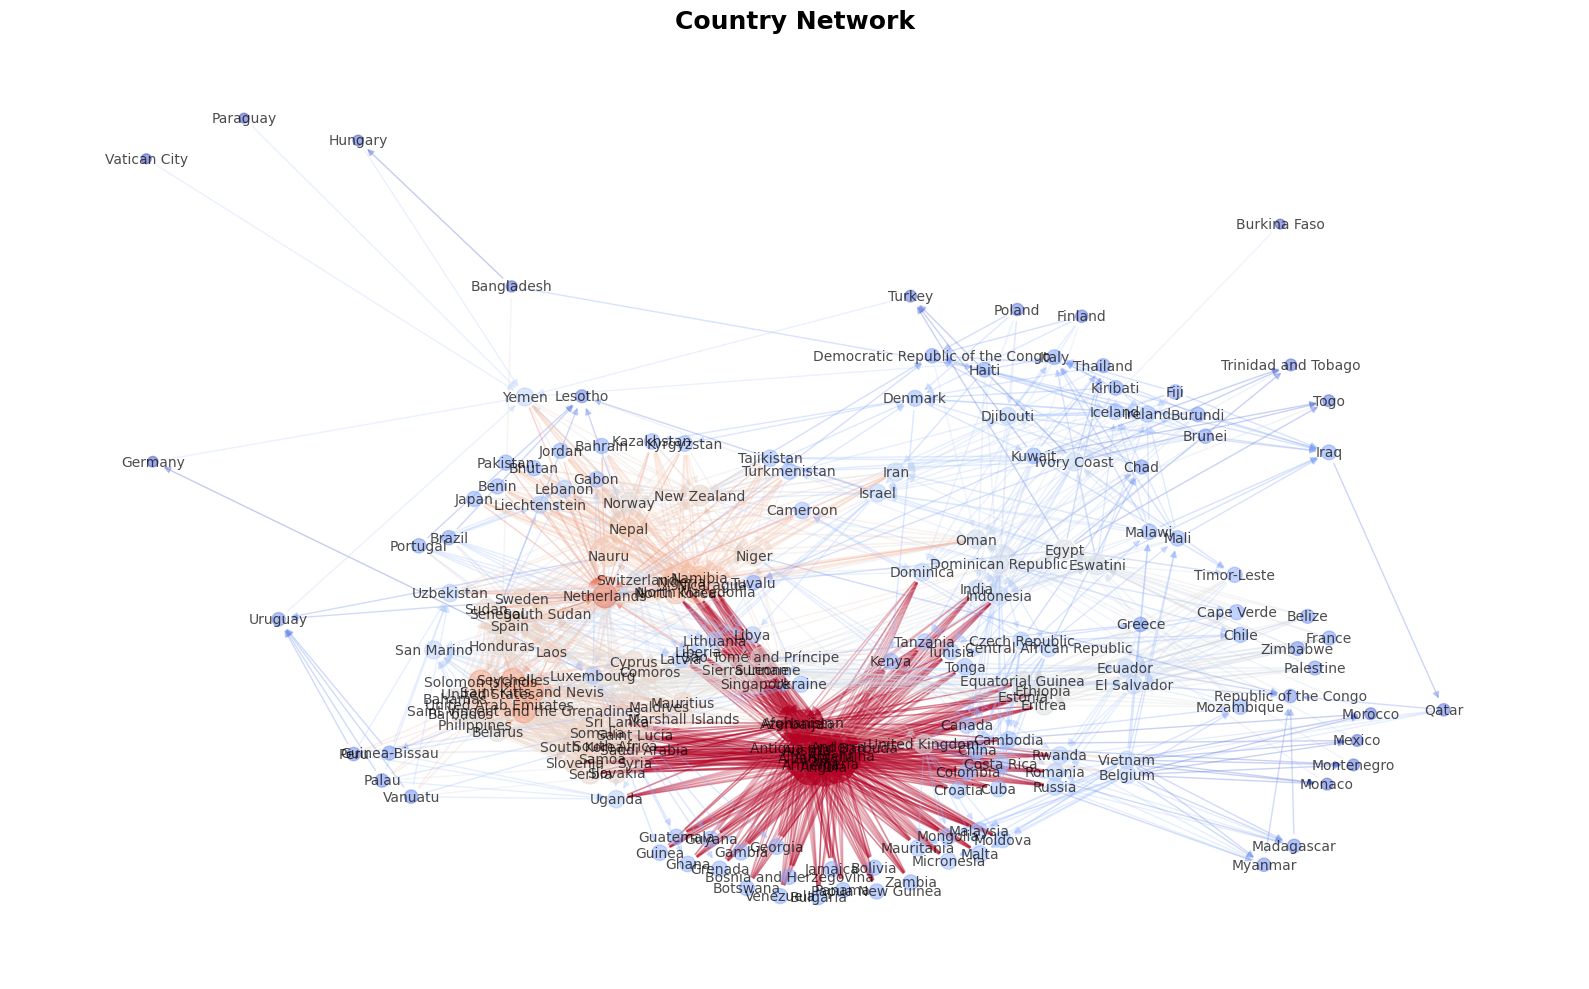

In [ ]:
fig, ax = plot_network(country_net, "Country Network")
plt.show(fig)
fig.savefig("country_net.png", dpi=1000)

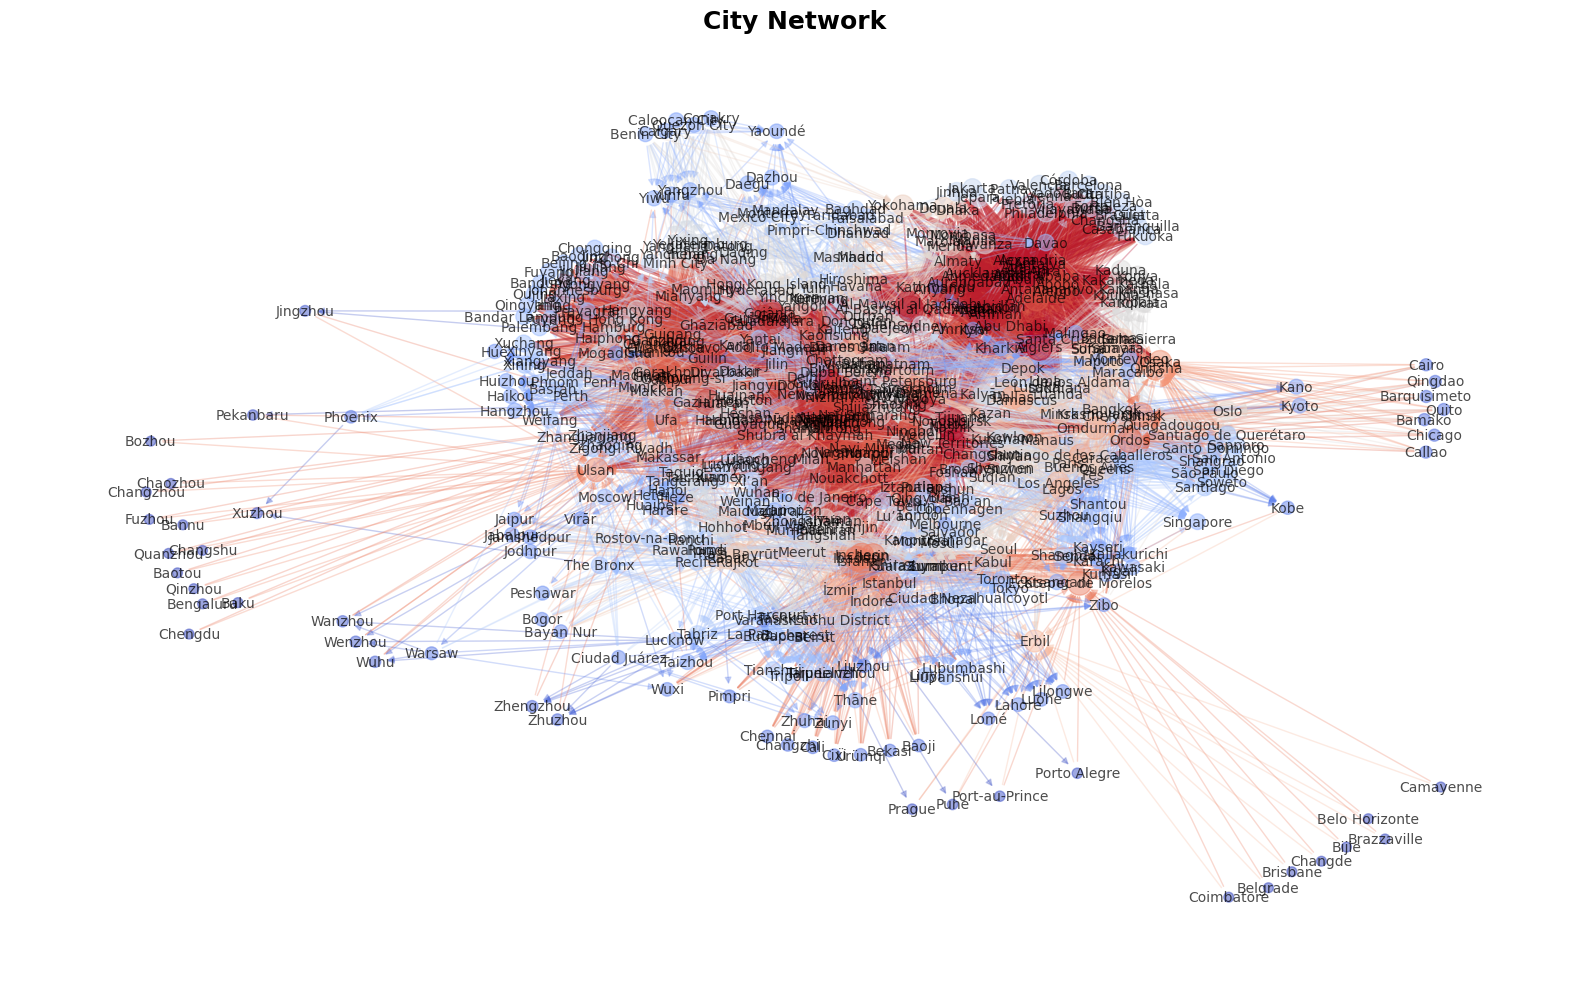

In [ ]:
fig, ax = plot_network(city_net, "City Network")
plt.show(fig)
fig.savefig("city_net.png", dpi=1000)

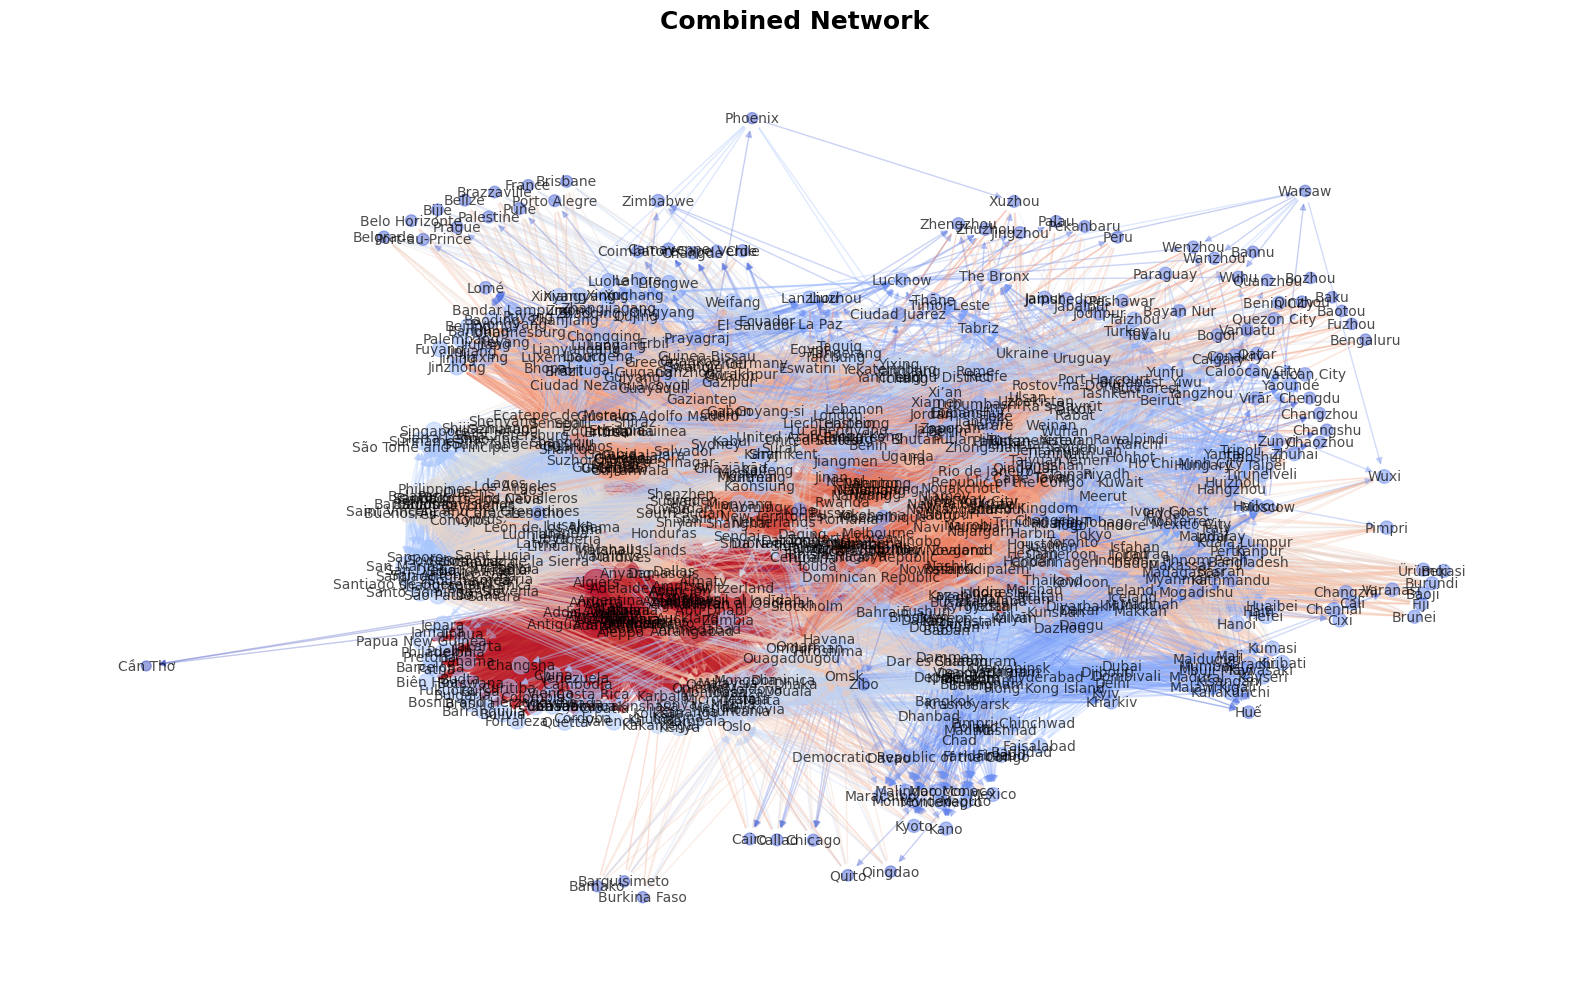

In [ ]:
fig, ax = plot_network(combined_net, "Combined Network")
plt.show(fig)
fig.savefig("combined_net.png", dpi=1000)

## Letter Graphs

In [12]:
country_letter = nx.read_graphml("../networks/graphml/countries_letter_net.graphml")
city_letter = nx.read_graphml("../networks/graphml/cities_letter_net.graphml")
combined_letter = nx.read_graphml("../networks/graphml/combined_letter_net.graphml")

In [49]:
def plot_letter(G, title):
    plt.figure(figsize=(8,6), dpi=500)
    pos = nx.spring_layout(G, k=1.5, iterations=100)
    nx.draw_networkx_nodes(G, pos=pos, node_size=[d*10 for n,d in G.out_degree()])
    nx.draw_networkx_edges(G, pos=pos)
    nx.draw_networkx_labels(G, pos=pos)
    plt.title(f"Letter Net for {title}")
    plt.show()

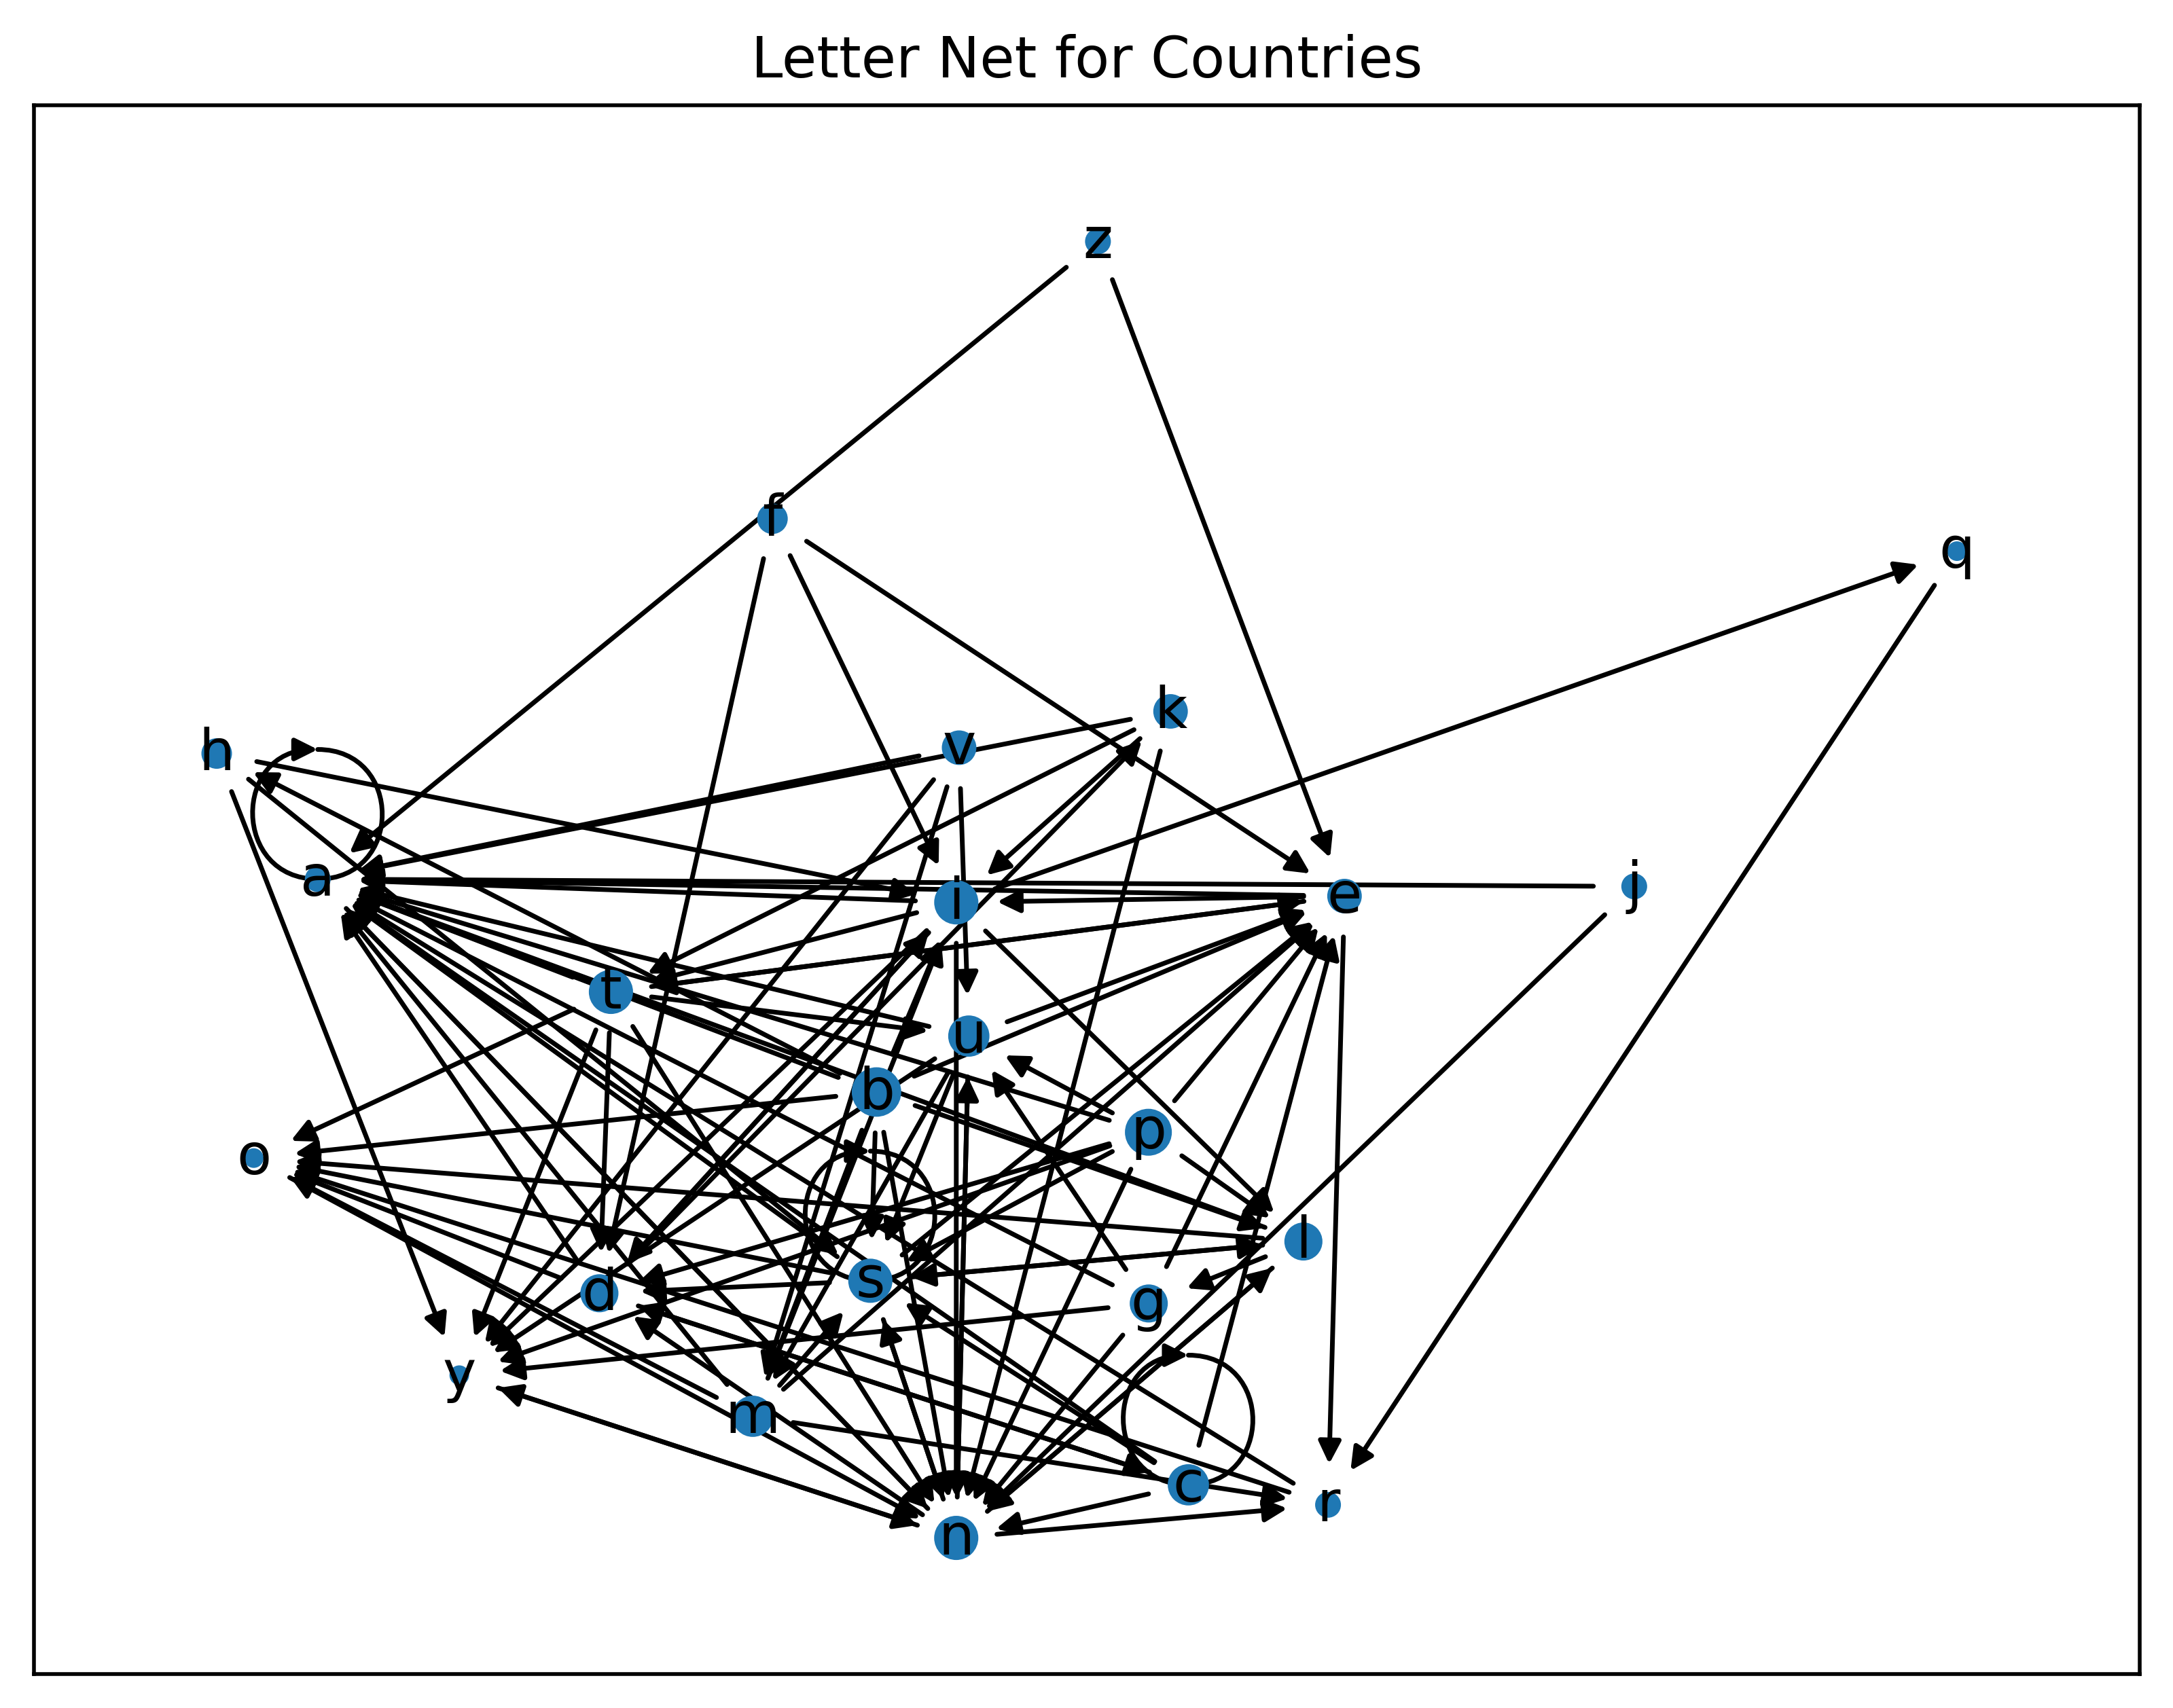

In [50]:
plot_letter(country_letter, "Countries")

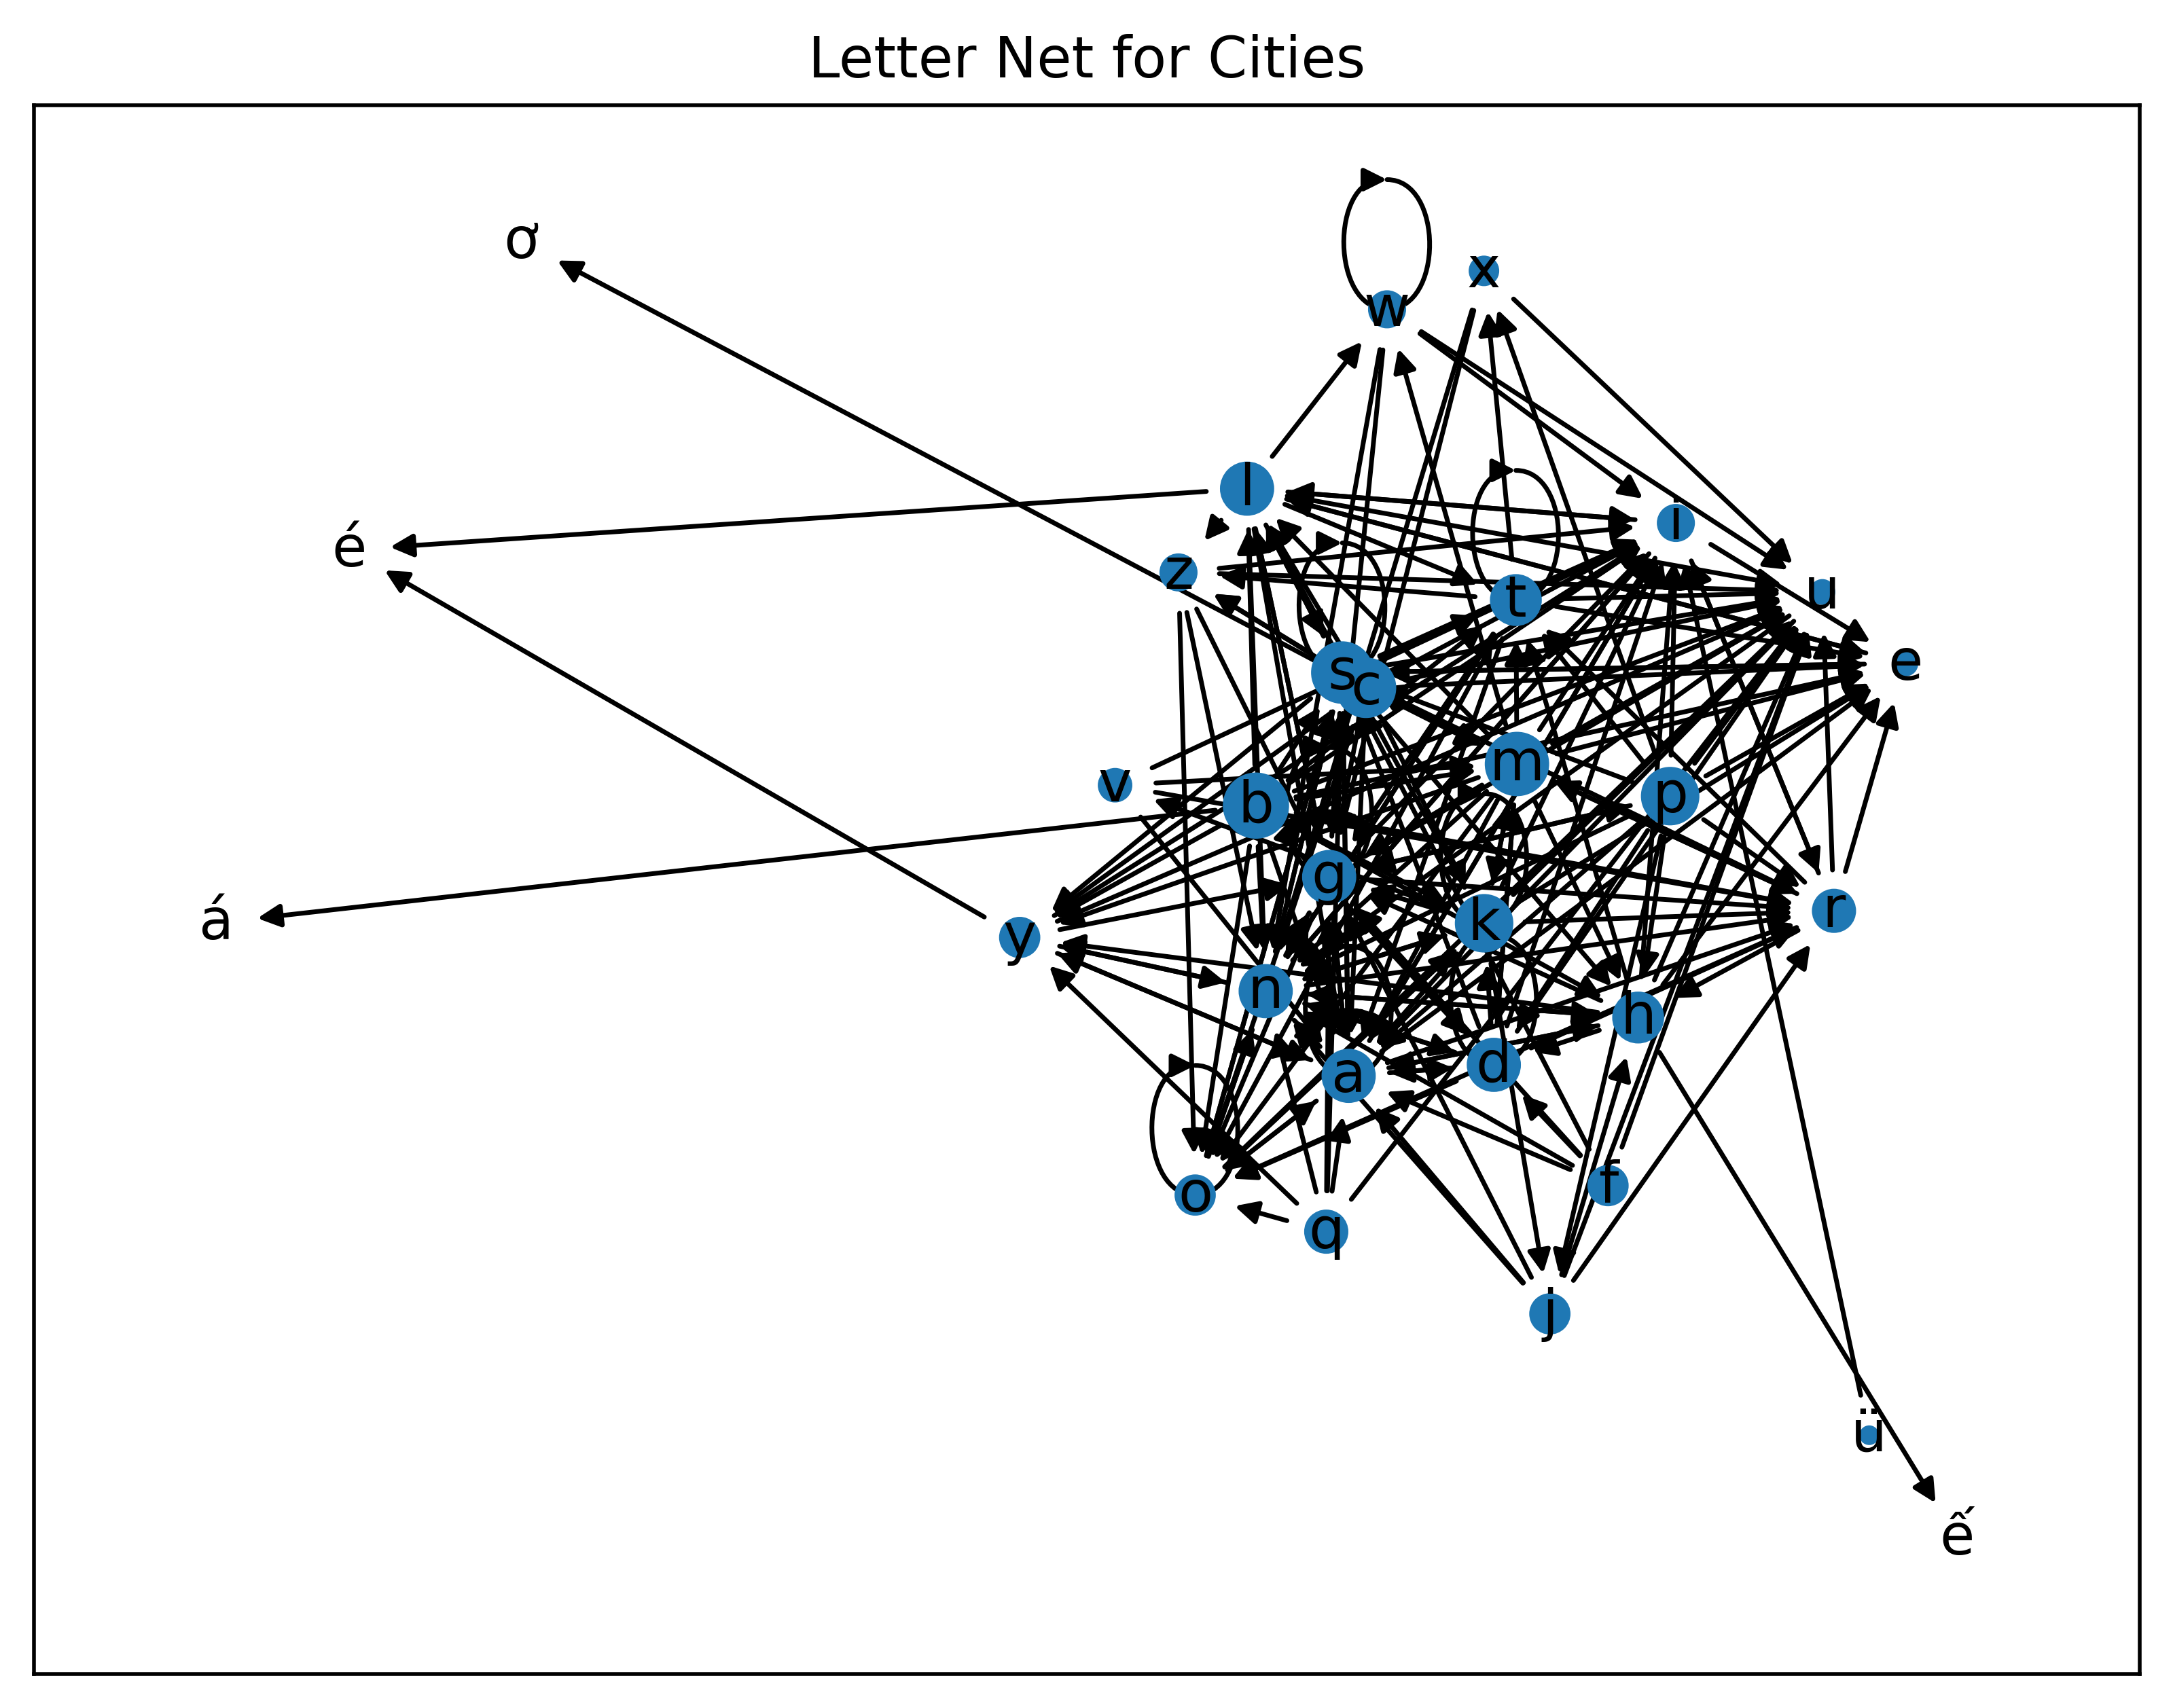

In [51]:
plot_letter(city_letter, "Cities")

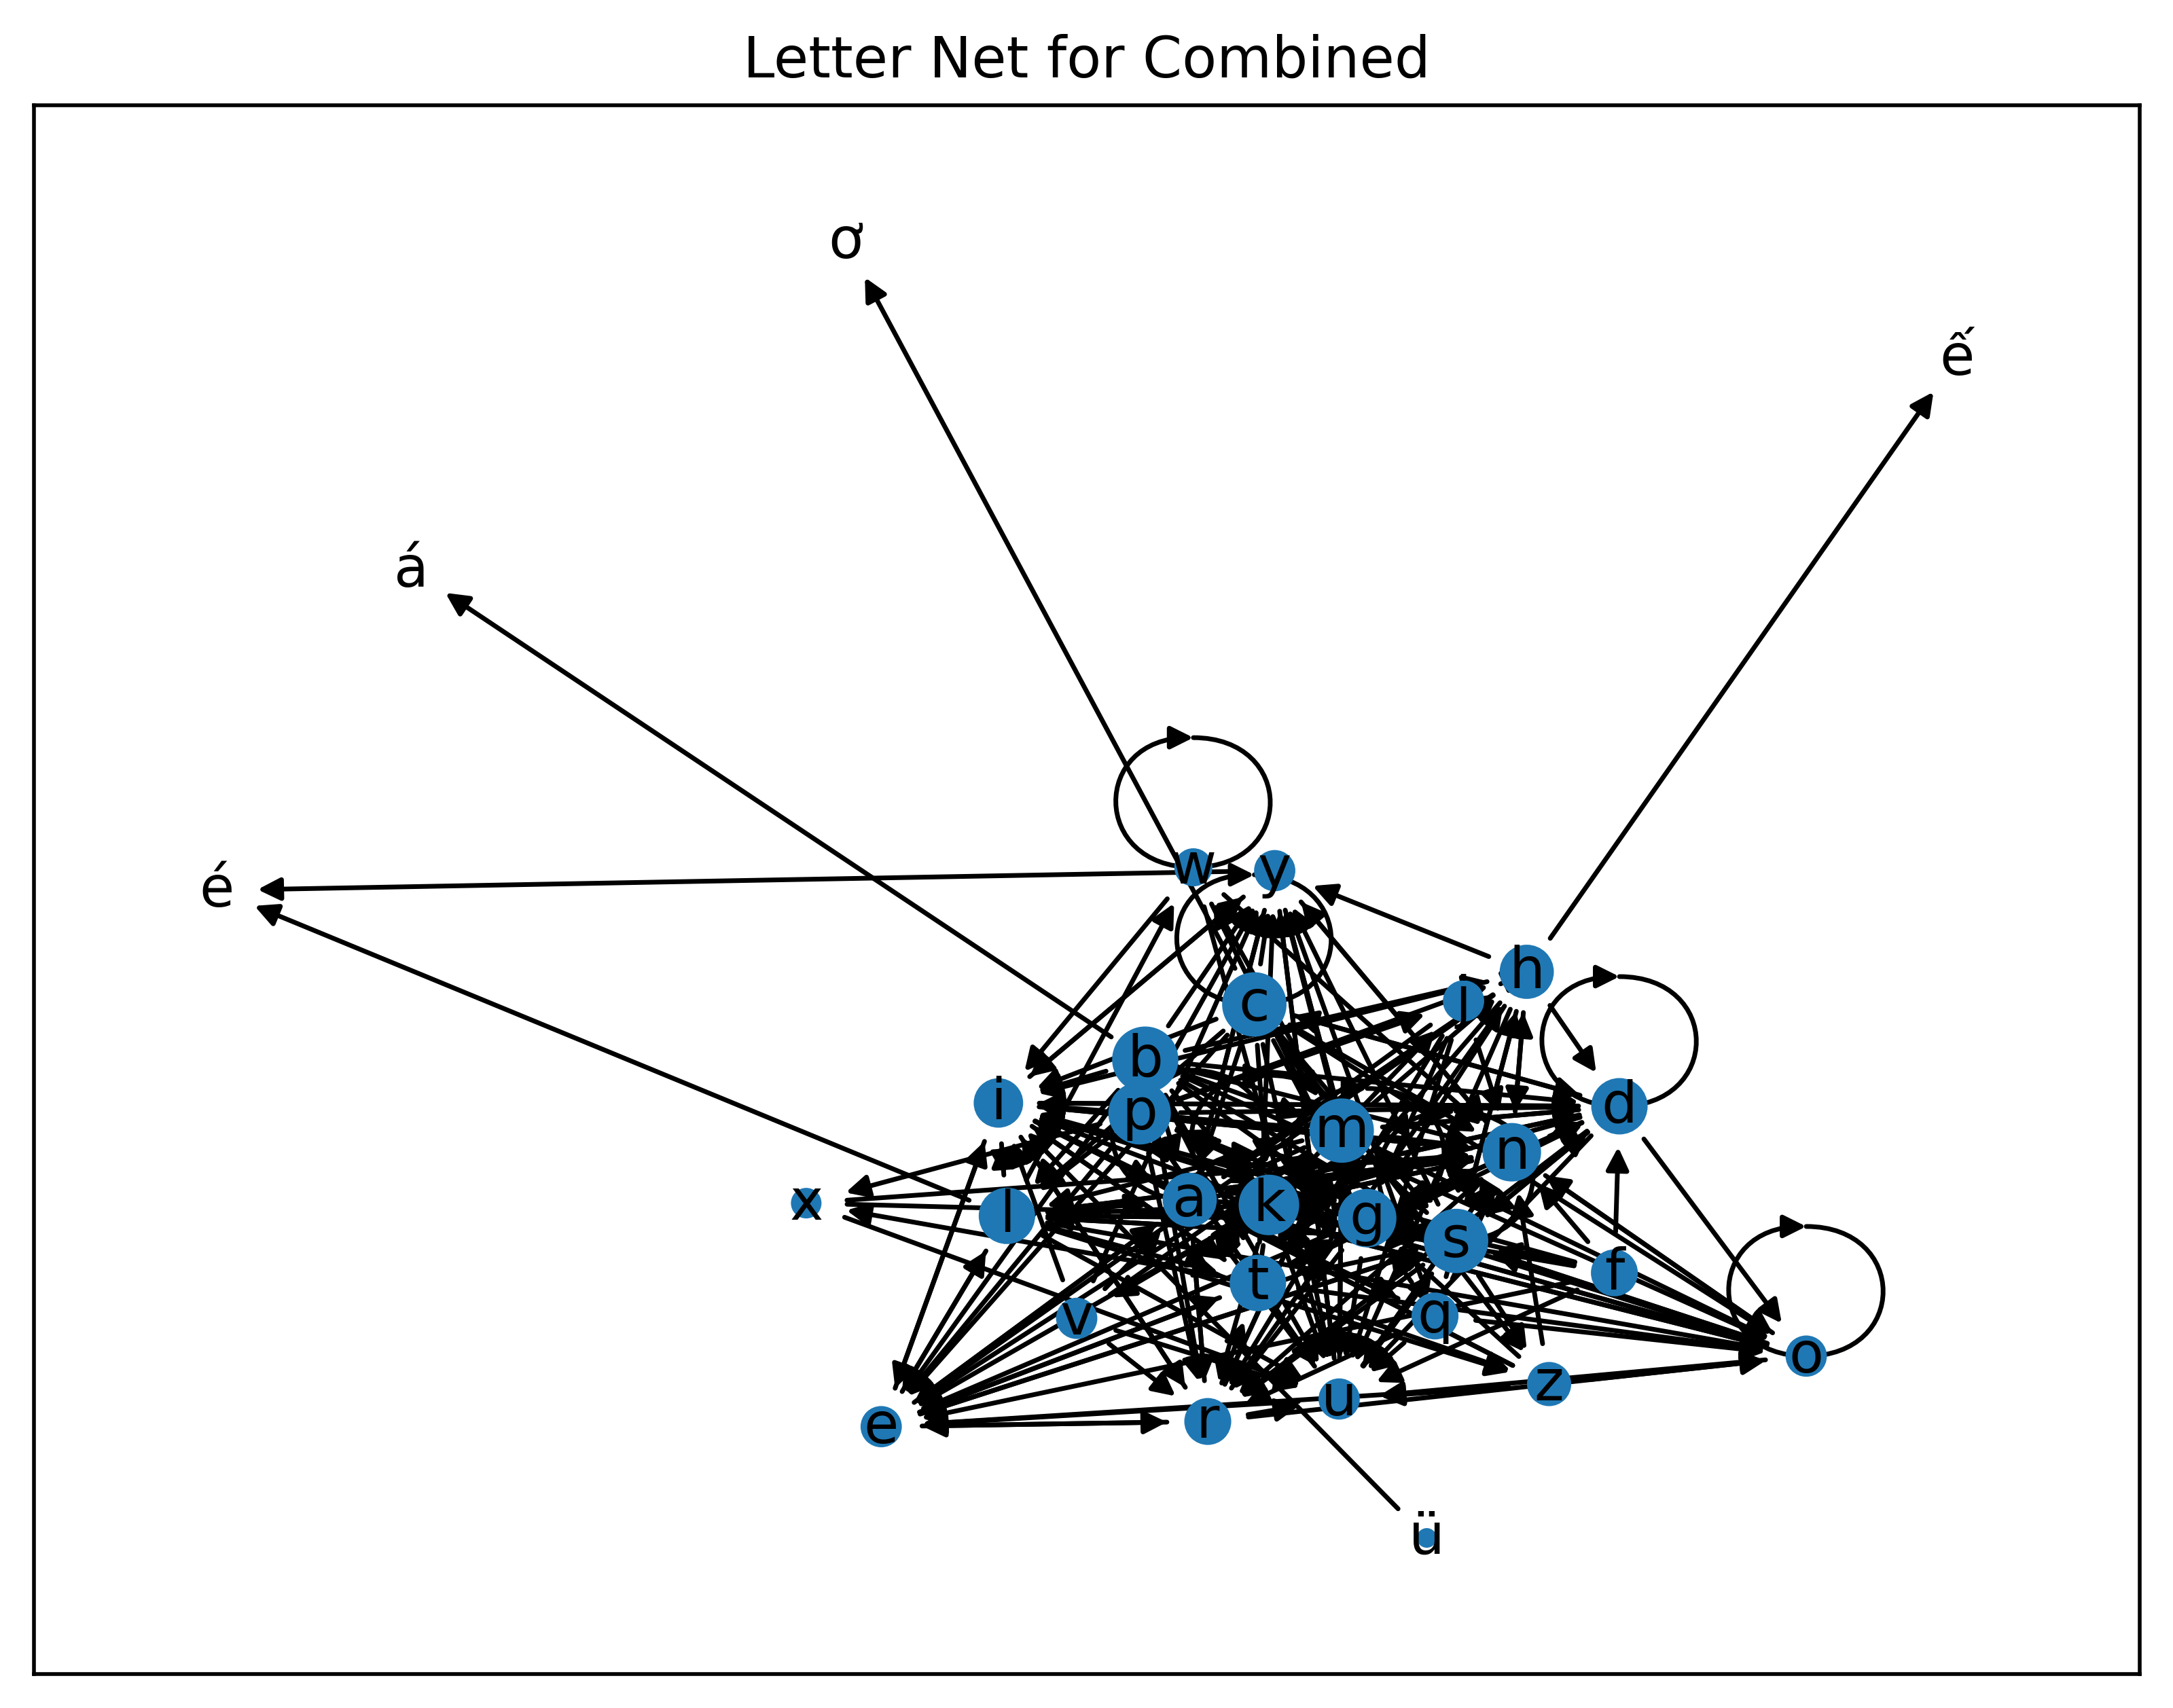

In [52]:
plot_letter(combined_letter_net, "Combined")

## Line Graphs

In [44]:
country_line = nx.read_graphml("../networks/graphml/countries_line.graphml")
city_line = nx.read_graphml("../networks/graphml/cities_line.graphml")
combined_line = nx.read_graphml("../networks/graphml/combined_line.graphml")

In [62]:
def plot_line(G, title):
    plt.figure(figsize=(8,6), dpi=500)
    pos = nx.spring_layout(G, k=1.5, iterations=50)
    nx.draw_networkx_nodes(G, pos=pos, node_size=[d*10 for n,d in G.out_degree()], alpha=0.5)
    nx.draw_networkx_edges(G, pos=pos)
    plt.title(f"Line Graph for {title}")
    plt.show()

In [73]:
country_line_sinks = [n for n, d in country_line.out_degree() if d == 0]
country_line_sinks

[]

In [75]:
city_line_sinks = [n for n, d in city_line.out_degree() if d == 0]
city_line_sinks

["('Istanbul', 'Lomé')",
 "('Guayaquil', 'Lomé')",
 "('New York City', 'Yaoundé')",
 "('New Taipei City', 'Yaoundé')",
 "('Najafgarh', 'Huế')",
 "('Niamey', 'Yaoundé')",
 "('Al Mawşil al Jadīdah', 'Huế')",
 "('Al Başrah al Qadīmah', 'Huế')",
 "('Almaty', 'Yaoundé')",
 "('Seoul', 'Lomé')",
 "('Sydney', 'Yaoundé')",
 "('Sharjah', 'Huế')",
 "('Shubrā al Khaymah', 'Huế')",
 "('Ho Chi Minh City', 'Yaoundé')",
 "('Erbil', 'Lomé')",
 "('Mexico City', 'Yaoundé')",
 "('Montréal', 'Lomé')",
 "('Mosul', 'Lomé')",
 "('Makkah', 'Huế')",
 "('Madinah', 'Huế')",
 "('Munich', 'Huế')",
 "('Mandalay', 'Yaoundé')",
 "('Monterrey', 'Yaoundé')",
 "('Kabul', 'Lomé')",
 "('Riyadh', 'Huế')",
 "('Jeddah', 'Huế')",
 "('Quezon City', 'Yaoundé')",
 "('Perth', 'Huế')",
 "('Phnom Penh', 'Huế')",
 "('Conakry', 'Yaoundé')",
 "('Bhopal', 'Lomé')",
 "('Benin City', 'Yaoundé')",
 "('Caloocan City', 'Yaoundé')",
 "('Basrah', 'Huế')",
 "('Calgary', 'Yaoundé')",
 "('Ciudad Nezahualcoyotl', 'Lomé')"]

In [76]:
combined_line_sinks = [n for n, d in combined_line.out_degree() if d == 0]
combined_line_sinks

["('Nepal', 'Lomé')",
 "('Norway', 'Yaoundé')",
 "('New York City', 'Yaoundé')",
 "('New Taipei City', 'Yaoundé')",
 "('Najafgarh', 'Huế')",
 "('Niamey', 'Yaoundé')",
 "('Al Mawşil al Jadīdah', 'Huế')",
 "('Al Başrah al Qadīmah', 'Huế')",
 "('Almaty', 'Yaoundé')",
 "('Senegal', 'Lomé')",
 "('Seoul', 'Lomé')",
 "('Sydney', 'Yaoundé')",
 "('Sharjah', 'Huế')",
 "('Shubrā al Khaymah', 'Huế')",
 "('Hungary', 'Yaoundé')",
 "('Ho Chi Minh City', 'Yaoundé')",
 "('Bangladesh', 'Huế')",
 "('Mexico City', 'Yaoundé')",
 "('Montréal', 'Lomé')",
 "('Mosul', 'Lomé')",
 "('Makkah', 'Huế')",
 "('Madinah', 'Huế')",
 "('Munich', 'Huế')",
 "('Mandalay', 'Yaoundé')",
 "('Monterrey', 'Yaoundé')",
 "('Erbil', 'Lomé')",
 "('Brazil', 'Lomé')",
 "('Israel', 'Lomé')",
 "('Italy', 'Yaoundé')",
 "('Istanbul', 'Lomé')",
 "('Czech Republic', 'Cần Thơ')",
 "('Conakry', 'Yaoundé')",
 "('Caloocan City', 'Yaoundé')",
 "('Central African Republic', 'Cần Thơ')",
 "('Calgary', 'Yaoundé')",
 "('Ciudad Nezahualcoyotl', 'Lomé

### Letter Line Graphs

In [64]:
country_letter_line = nx.read_graphml("../networks/graphml/countries_letter_line.graphml")
city_letter_line = nx.read_graphml("../networks/graphml/cities_letter_line.graphml")
combined_letter_line = nx.read_graphml("../networks/graphml/combined_letter_line.graphml")

In [77]:
country_letter_line_sinks = [n for n, d in country_letter_line.out_degree() if d == 0]
country_letter_line_sinks

[]

In [78]:
city_letter_line_sinks = [n for n, d in city_letter_line.out_degree() if d == 0]
city_letter_line_sinks

["('l', 'é')", "('y', 'é')", "('h', 'ế')", "('b', 'á')", "('c', 'ơ')"]

In [69]:
def plot_letter_line(G, title):
    plt.figure(figsize=(8,6), dpi=500)
    pos = nx.spring_layout(G, k=1.5, iterations=100)
    nx.draw_networkx_nodes(G, pos=pos, node_size=[d*10 for n,d in G.out_degree()])
    nx.draw_networkx_edges(G, pos=pos)
    plt.title(f"Letter Net for {title}")
    plt.show()

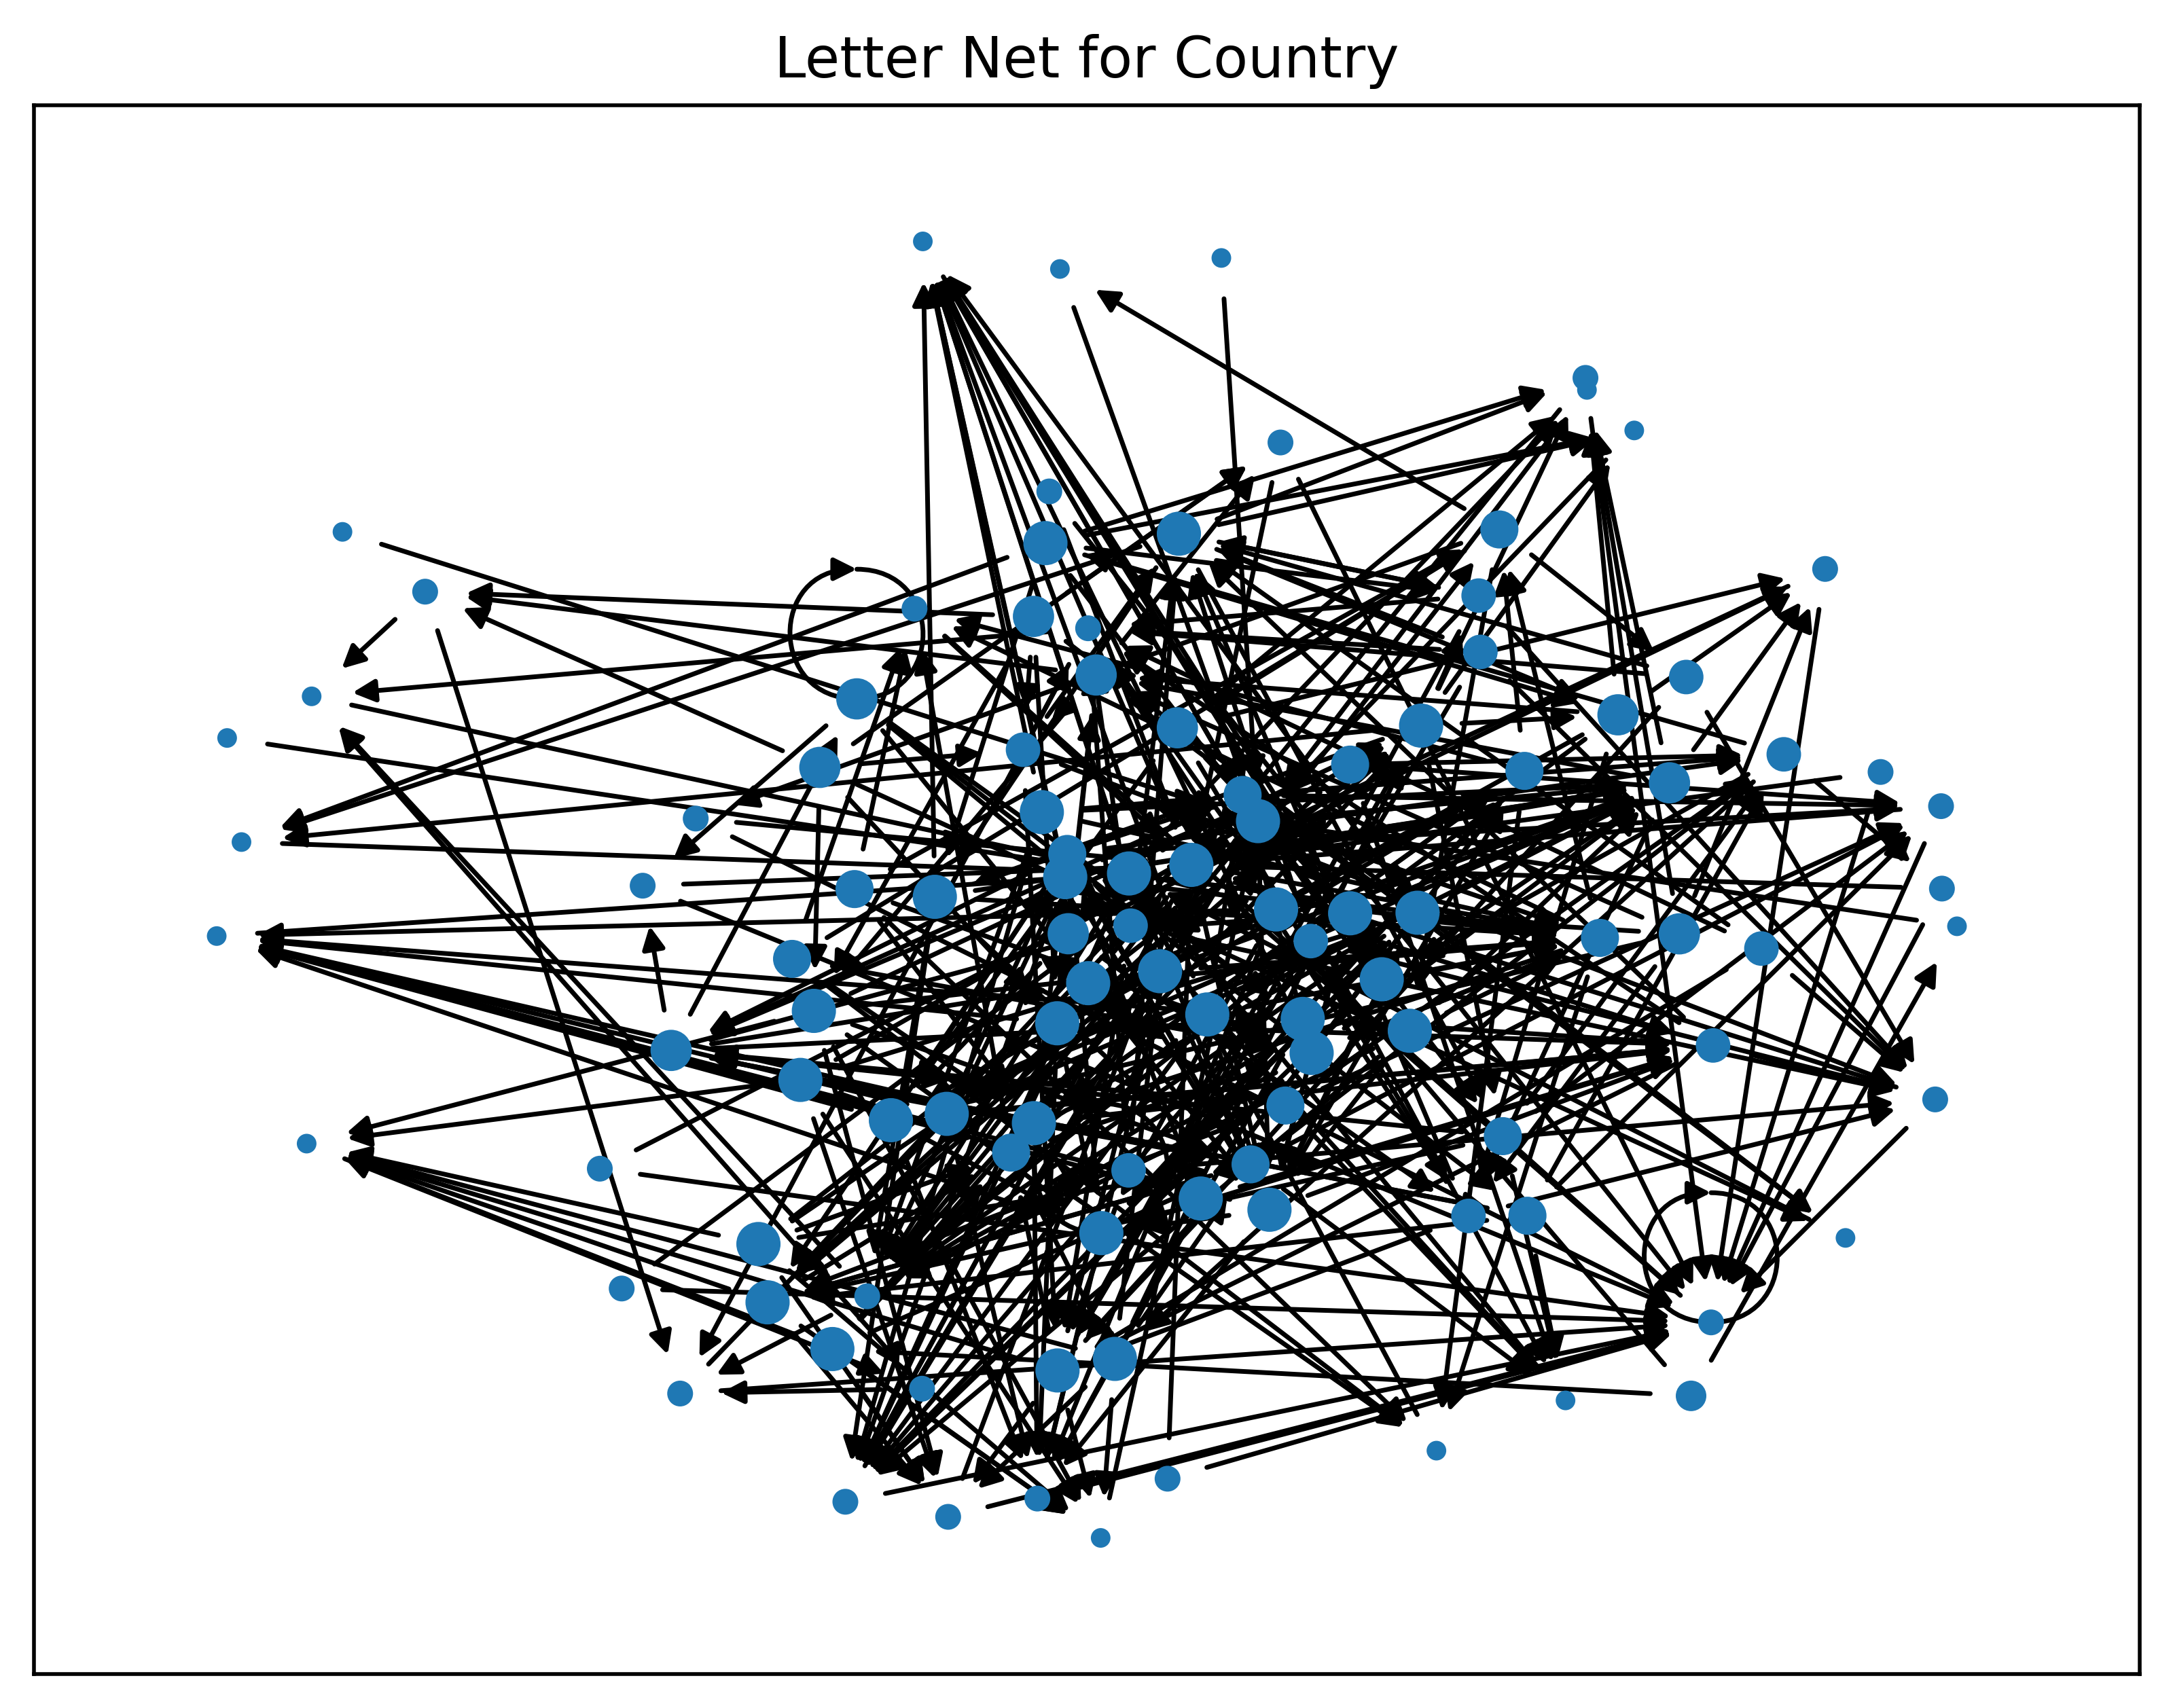

In [70]:
plot_letter_line(country_letter_line, "Country")

## Embeddings

In [4]:
country_nodes_1_01 = KeyedVectors.load("../node2vec/node/node2vec_64_50_500_p1_q0_1.kv")
country_nodes_1_05 = KeyedVectors.load("../node2vec/node/node2vec_64_50_500_p1_q0_5.kv")
country_nodes_1_1 = KeyedVectors.load("../node2vec/node/node2vec_64_50_500_p1_q1.kv")
country_nodes_1_2 = KeyedVectors.load("../node2vec/node/node2vec_64_50_500_p1_q2.kv")
country_nodes_1_10 = KeyedVectors.load("../node2vec/node/node2vec_64_50_500_p1_q10.kv")

In [29]:
def plot_2d(vec, title, p, q):
    # 1. Reduce 64D to 2D using PCA
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(vec.vectors[:150]) # Use a subset for clarity
    labels = vec.index_to_key[:150]

    # 2. Setup Aesthetic Style (Clean & Modern)
    plt.style.use('fivethirtyeight') # Or 'ggplot'
    fig, ax = plt.subplots(figsize=(14, 10))

    # 3. Create Scatter Plot with Overlap Management
    scatter = ax.scatter(
        reduced_vectors[:, 0], reduced_vectors[:, 1],
        alpha=0.4,          # Low alpha makes overlaps appear as darker "hotspots"
        s=150,               # Slightly larger markers for 2D
        c=reduced_vectors[:, 0], # Aesthetic gradient color
        cmap='plasma',
        edgecolors='none'
    )

    # 4. Resolve Label Overlaps with adjust_text
    texts = []
    for i, label in enumerate(labels):
        texts.append(ax.text(reduced_vectors[i, 0], reduced_vectors[i, 1], label, 
                            fontsize=8, fontweight='light'))

    # This iteratively moves text boxes away from each other and from markers
    # adjust_text(texts, 
    #             only_move={'points':'y', 'text':'xy'}, 
    #             arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

    # 5. Final Styling
    ax.set_title(f"2D PCA Projection of {title} Space: p={p}, q={q}", fontsize=18, fontweight='bold', pad=20)
    ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% Variance)")
    ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% Variance)")
    plt.tight_layout()
    plt.show()


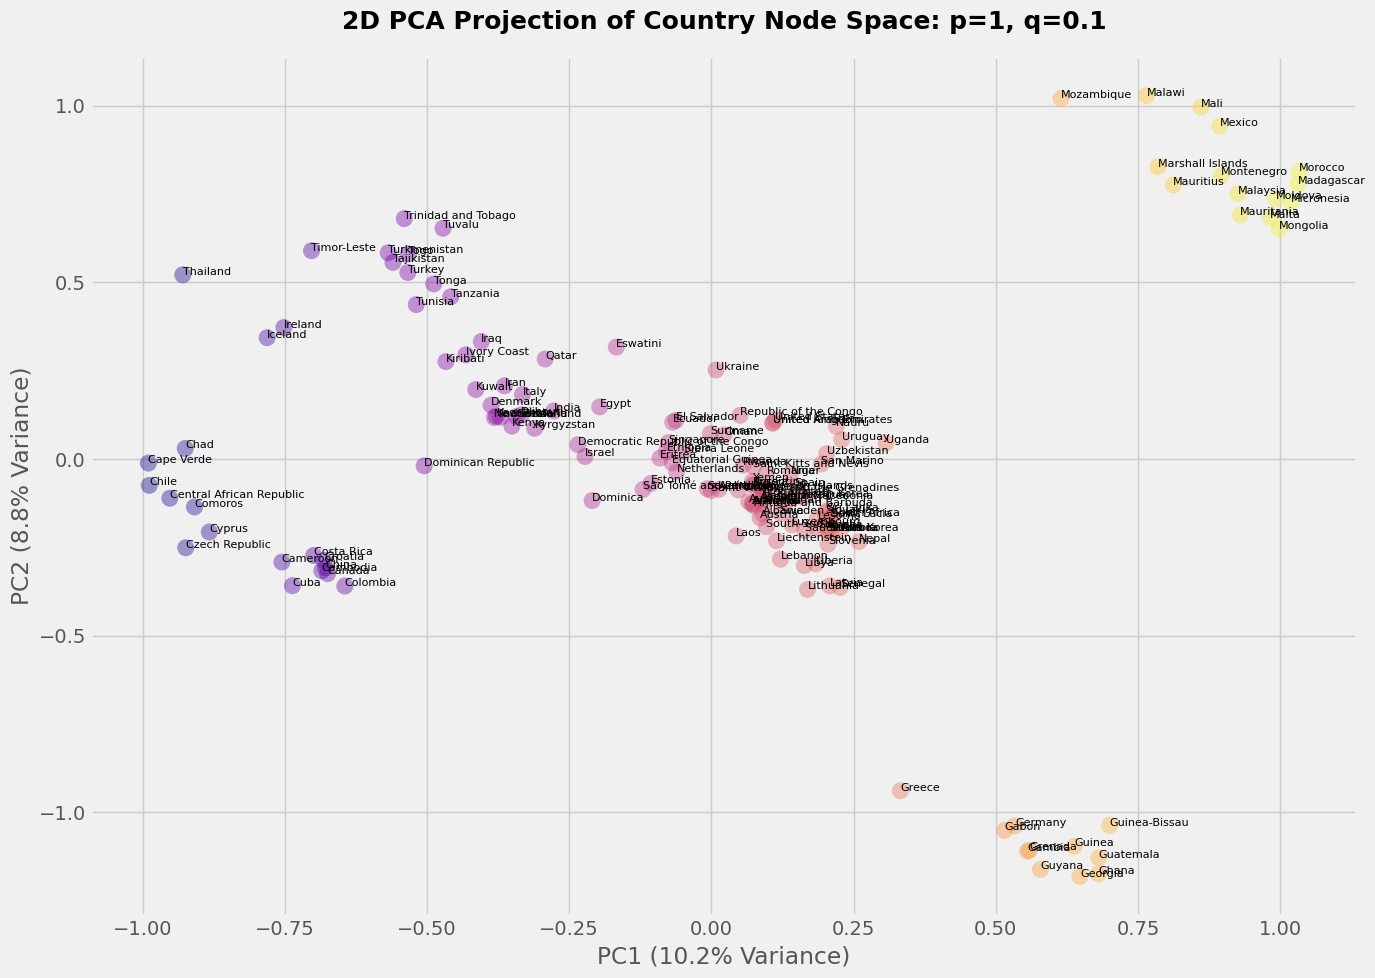

In [30]:
plot_2d(country_nodes_1_01, "Country Node", p=1, q=0.1)

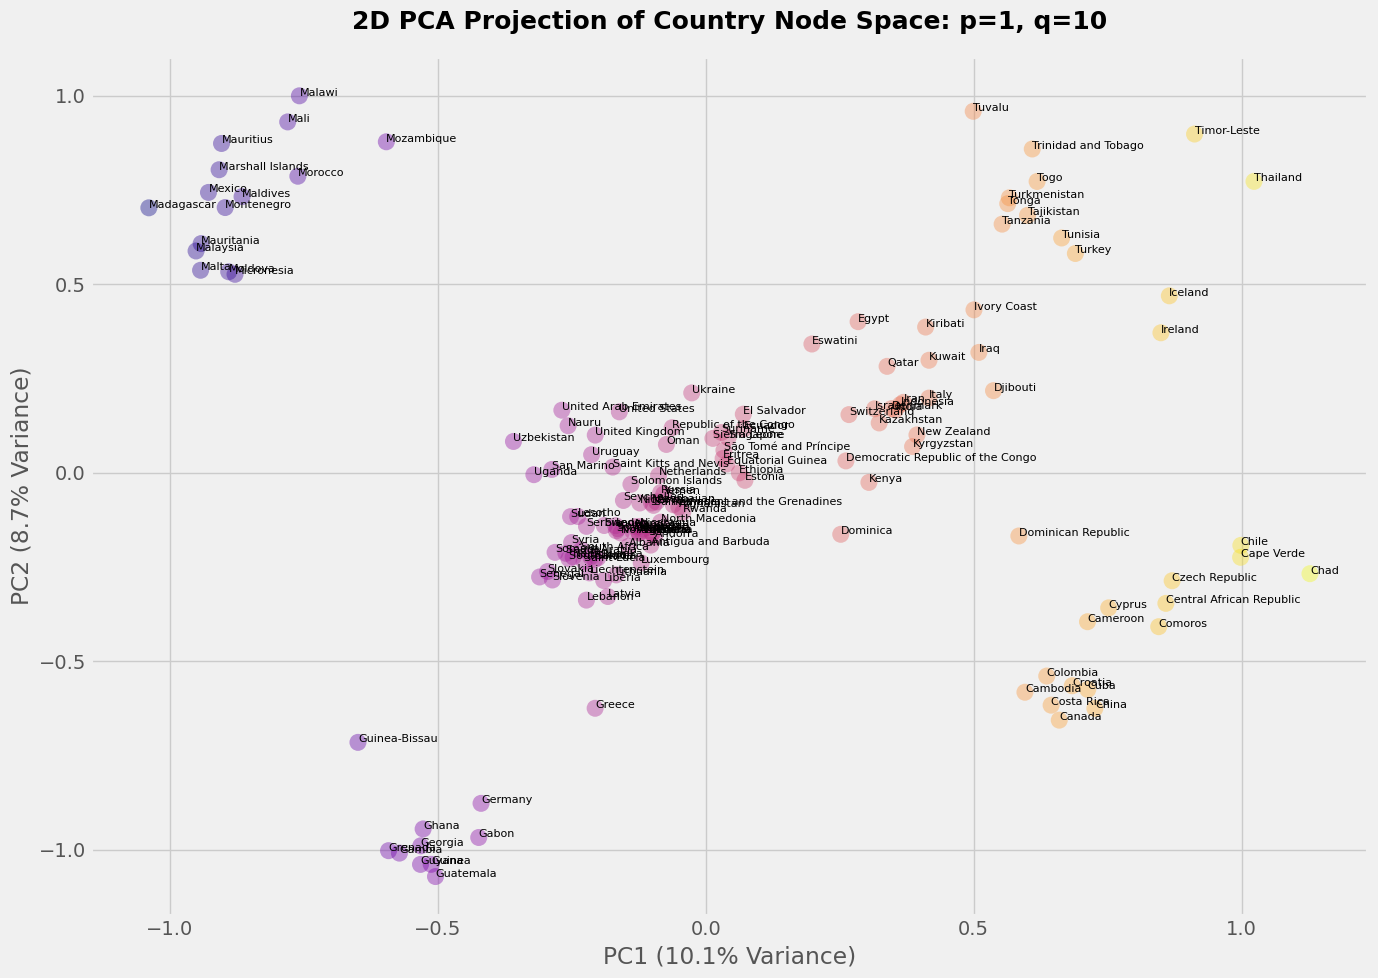

In [31]:
plot_2d(country_nodes_1_10, "Country Node", p=1, q=10)

In [26]:
country_edges_1_05 = KeyedVectors.load("../node2vec/edge/edge_embeddings_64_50_500_p1_q0_5.kv")
country_edges_1_1 = KeyedVectors.load("../node2vec/edge/edge_embeddings_64_50_500_p1_q1.kv")
country_edges_1_2 = KeyedVectors.load("../node2vec/edge/edge_embeddings_64_50_500_p1_q2.kv")

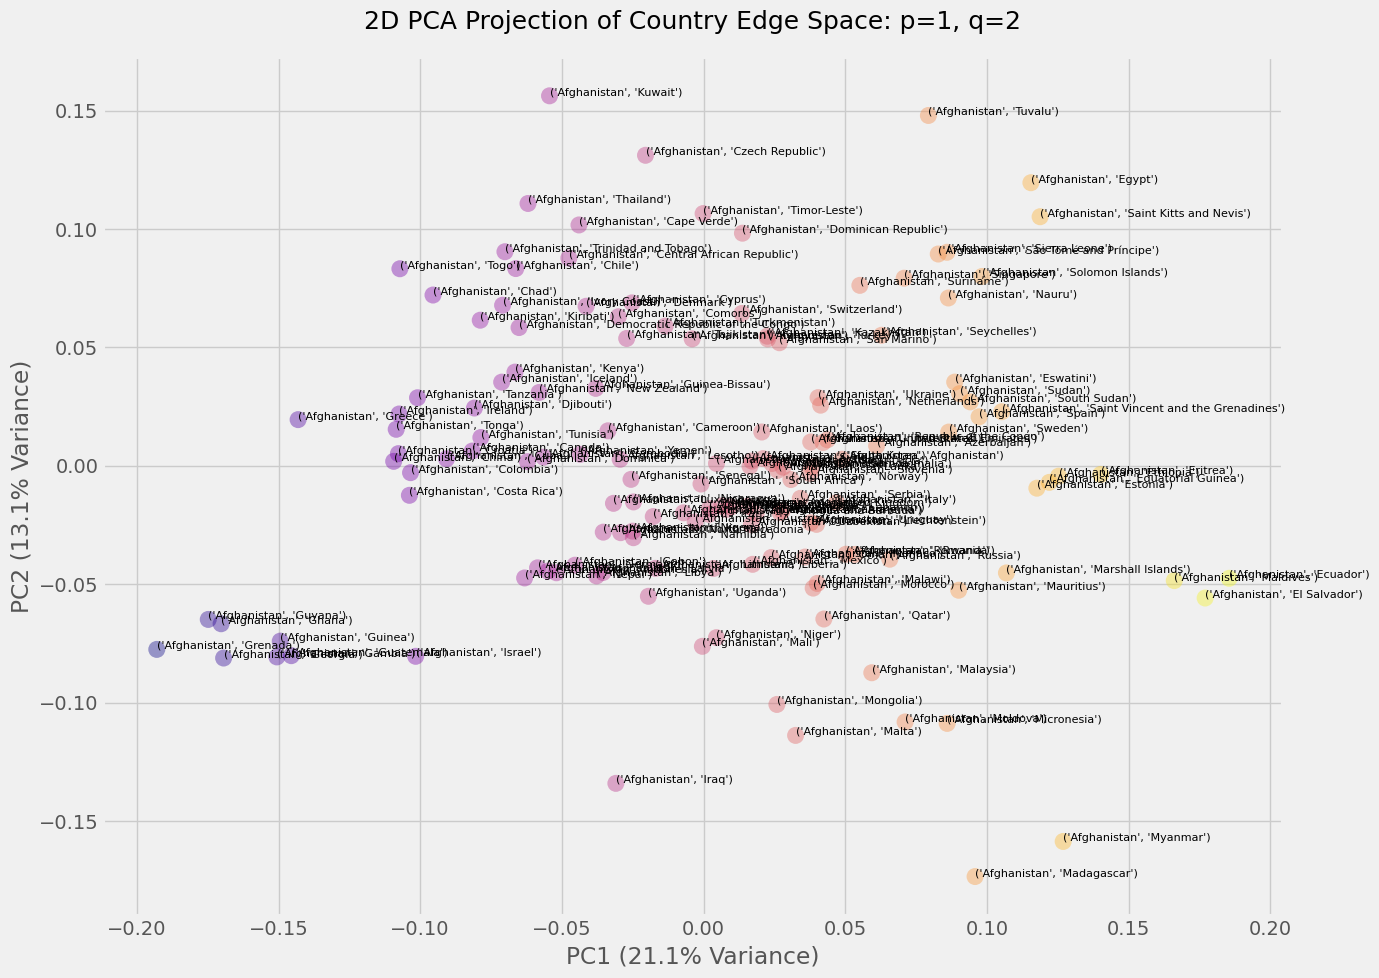

In [27]:
plot_2d(country_edges_1_2, "Country Edge", p=1, q=2)

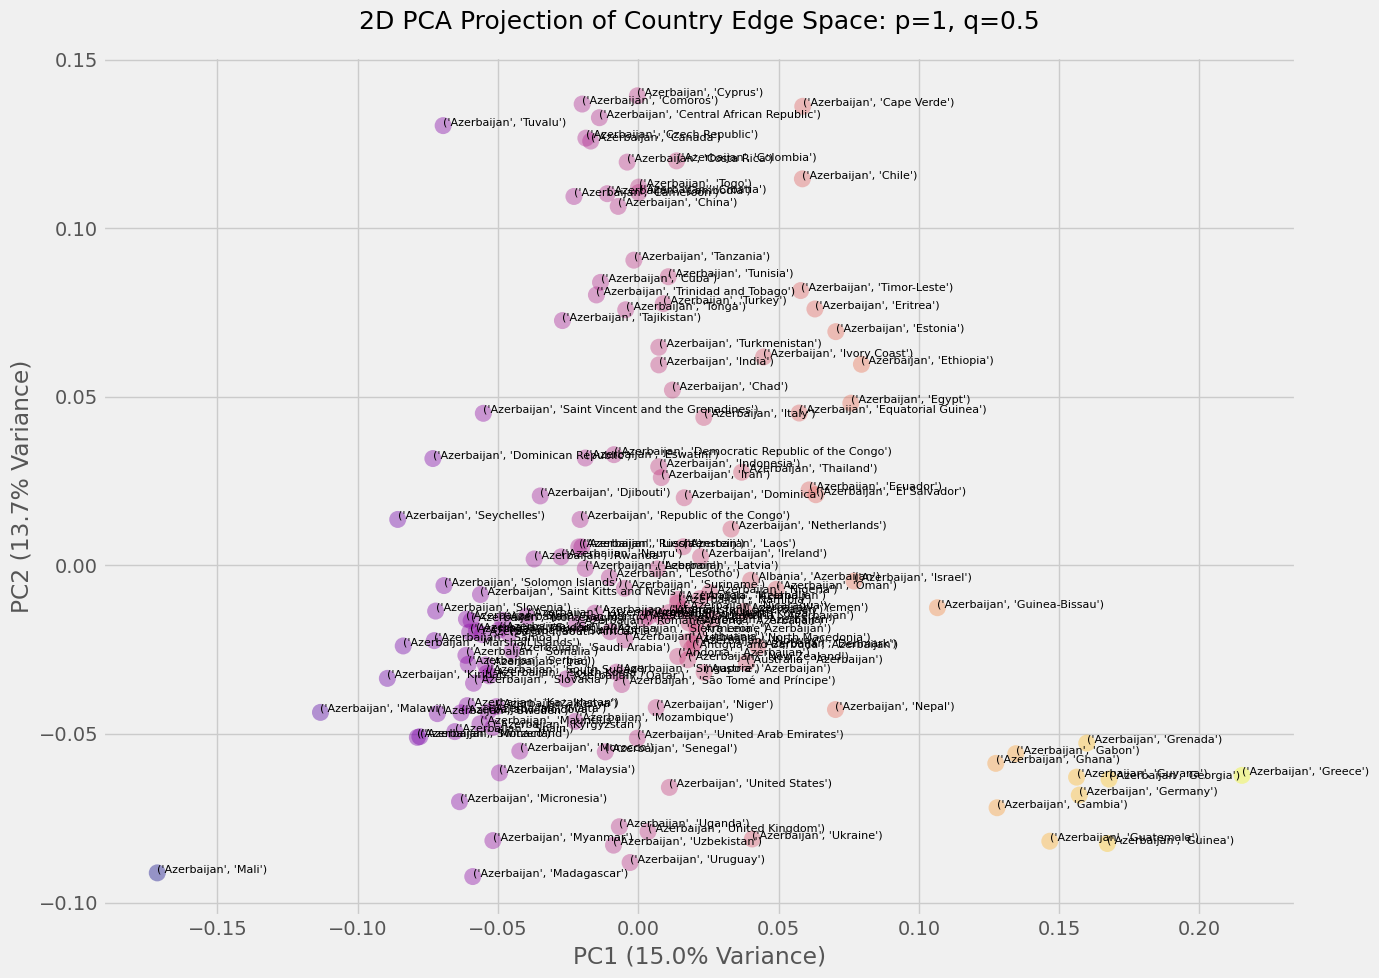

In [28]:
plot_2d(country_edges_1_05, "Country Edge", p=1, q=0.5)

---